In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
sns.set(style = 'darkgrid')

In [3]:
df = pd.read_excel('C:/Users/acer/Downloads/Data_Train.xlsx')

In [4]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [5]:
df.shape

(10683, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [8]:
df.describe(include=object)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


In [9]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [10]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [11]:
df.groupby(['Airline'])['Price'].agg([max,min])

,max,min
Airline,,
Air Asia,13774,3383
Air India,31945,2050
GoAir,22794,3398
IndiGo,22153,2227
Jet Airways,54826,1840
Jet Airways Business,79512,46490
Multiple carriers,36983,5797
Multiple carriers Premium economy,14629,9845
SpiceJet,23267,1759


In [12]:
df['Route'].mode()

0    DEL → BOM → COK
dtype: object

In [13]:
df['Route'] = df['Route'].fillna(df['Route'].mode()[0])  

In [14]:
df['Total_Stops'].mode()

0    1 stop
dtype: object

In [15]:
df['Total_Stops'] = df['Total_Stops'].fillna(df['Total_Stops'].mode()[0])

In [16]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [17]:
df['Date_of_Journey']  = pd.to_datetime(df['Date_of_Journey'])
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'])
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10683 non-null  object        
 5   Dep_Time         10683 non-null  datetime64[ns]
 6   Arrival_Time     10683 non-null  datetime64[ns]
 7   Duration         10683 non-null  object        
 8   Total_Stops      10683 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 918.2+ KB


In [19]:
df['Date_of_Journey'].mode()

0   2019-05-18
dtype: datetime64[ns]

In [20]:
df['Total_Stops'].mode()

0    1 stop
dtype: object

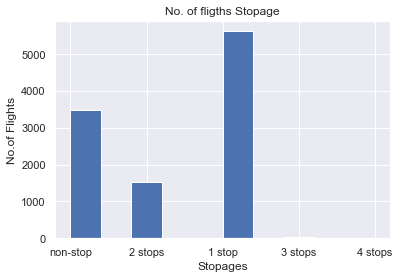

In [21]:
#This Histogram shows the no.of stopages of flights
plt.title('No. of fligths Stopage')
plt.hist(df['Total_Stops'])
plt.xlabel('Stopages')
plt.ylabel('No.of Flights')
plt.show()

In [22]:
df['Date_of_Journey'].unique()

array(['2019-03-24T00:00:00.000000000', '2019-01-05T00:00:00.000000000',
       '2019-09-06T00:00:00.000000000', '2019-12-05T00:00:00.000000000',
       '2019-01-03T00:00:00.000000000', '2019-06-24T00:00:00.000000000',
       '2019-12-03T00:00:00.000000000', '2019-05-27T00:00:00.000000000',
       '2019-01-06T00:00:00.000000000', '2019-04-18T00:00:00.000000000',
       '2019-09-05T00:00:00.000000000', '2019-04-24T00:00:00.000000000',
       '2019-03-03T00:00:00.000000000', '2019-04-15T00:00:00.000000000',
       '2019-12-06T00:00:00.000000000', '2019-06-03T00:00:00.000000000',
       '2019-03-21T00:00:00.000000000', '2019-03-04T00:00:00.000000000',
       '2019-06-05T00:00:00.000000000', '2019-05-15T00:00:00.000000000',
       '2019-06-18T00:00:00.000000000', '2019-06-15T00:00:00.000000000',
       '2019-06-04T00:00:00.000000000', '2019-05-18T00:00:00.000000000',
       '2019-06-27T00:00:00.000000000', '2019-05-21T00:00:00.000000000',
       '2019-03-06T00:00:00.000000000', '2019-03-15

In [23]:
df['Day_of_Journey']  = df['Date_of_Journey'].dt.day

In [24]:
df['Month_of_Journey'] = df['Date_of_Journey'].dt.month

In [25]:
df.drop(columns=['Date_of_Journey'],inplace=True)

In [26]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-04-29 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-04-29 05:50:00,2022-04-29 13:15:00,7h 25m,2 stops,No info,7662,5,1


In [27]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

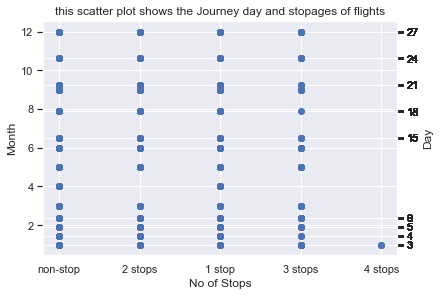

In [28]:
fig, ax = plt.subplots(constrained_layout=True)
month=list(df['Month_of_Journey'])
stopages=list(df["Total_Stops"])
day=list(df['Day_of_Journey'])
ax2=ax.twinx()
ax.scatter(stopages,month)
ax2.scatter(stopages,day)
ax.set_xlabel('No of Stops')
ax.set_ylabel('Month')
ax2.set_ylabel('Day')
plt.xticks(rotation=90,size=10)
plt.title("this scatter plot shows the Journey day and stopages of flights")
plt.yticks(day)
plt.show()

In [30]:
df.loc[df['Total_Stops']=='non-stop']

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-04-29 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
5,SpiceJet,Kolkata,Banglore,CCU → BLR,2022-04-29 09:00:00,2022-04-29 11:25:00,2h 25m,non-stop,No info,3873,24,6
11,IndiGo,Kolkata,Banglore,CCU → BLR,2022-04-29 20:20:00,2022-04-29 22:55:00,2h 35m,non-stop,No info,4174,18,4
12,Air India,Chennai,Kolkata,MAA → CCU,2022-04-29 11:40:00,2022-04-29 13:55:00,2h 15m,non-stop,No info,4667,24,6
14,IndiGo,Kolkata,Banglore,CCU → BLR,2022-04-29 17:15:00,2022-04-29 19:50:00,2h 35m,non-stop,No info,4804,24,4
...,...,...,...,...,...,...,...,...,...,...,...,...
10677,SpiceJet,Banglore,Delhi,BLR → DEL,2022-04-29 05:55:00,2022-04-29 08:35:00,2h 40m,non-stop,No check-in baggage included,3257,21,5
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2022-04-29 19:55:00,2022-04-29 22:25:00,2h 30m,non-stop,No info,4107,4,9
10679,Air India,Kolkata,Banglore,CCU → BLR,2022-04-29 20:45:00,2022-04-29 23:20:00,2h 35m,non-stop,No info,4145,27,4
10680,Jet Airways,Banglore,Delhi,BLR → DEL,2022-04-29 08:20:00,2022-04-29 11:20:00,3h,non-stop,No info,7229,27,4


In [31]:
df.loc[df['Total_Stops']=='2 stops']

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-04-29 05:50:00,2022-04-29 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2022-04-29 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9
15,Air India,Delhi,Cochin,DEL → AMD → BOM → COK,2022-04-29 16:40:00,2022-03-04 19:15:00,26h 35m,2 stops,No info,14011,3,3
18,Air India,Delhi,Cochin,DEL → CCU → BOM → COK,2022-04-29 20:15:00,2022-06-13 19:15:00,23h,2 stops,No info,13381,6,12
25,Jet Airways,Delhi,Cochin,DEL → IDR → BOM → COK,2022-04-29 21:25:00,2022-06-10 12:35:00,15h 10m,2 stops,No info,13292,6,9
...,...,...,...,...,...,...,...,...,...,...,...,...
10668,Jet Airways,Delhi,Cochin,DEL → JDH → BOM → COK,2022-04-29 11:40:00,2022-04-29 19:00:00,7h 20m,2 stops,No info,21219,5,9
10670,Air India,Kolkata,Banglore,CCU → IXR → DEL → BLR,2022-04-29 05:50:00,2022-04-29 23:15:00,17h 25m,2 stops,No info,11411,5,12
10672,Jet Airways,Delhi,Cochin,DEL → AMD → BOM → COK,2022-04-29 23:05:00,2022-06-28 19:00:00,19h 55m,2 stops,In-flight meal not included,11150,27,6
10673,Jet Airways,Delhi,Cochin,DEL → AMD → BOM → COK,2022-04-29 13:25:00,2022-05-28 04:25:00,15h,2 stops,No info,16704,27,5


In [32]:
df.loc[df['Total_Stops']=='1 stop']

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2022-04-29 18:05:00,2022-04-29 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2022-04-29 16:50:00,2022-04-29 21:35:00,4h 45m,1 stop,No info,13302,3,1
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,2022-04-29 18:55:00,2022-03-13 10:25:00,15h 30m,1 stop,In-flight meal not included,11087,3,12
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,2022-04-29 08:00:00,2022-03-02 05:05:00,21h 5m,1 stop,No info,22270,3,1
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,2022-04-29 08:55:00,2022-03-13 10:25:00,25h 30m,1 stop,In-flight meal not included,11087,3,12
...,...,...,...,...,...,...,...,...,...,...,...,...
10666,Jet Airways,Delhi,Cochin,DEL → BOM → COK,2022-04-29 18:15:00,2022-06-13 19:00:00,24h 45m,1 stop,In-flight meal not included,10262,6,12
10667,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,2022-04-29 22:55:00,2022-03-13 20:20:00,21h 25m,1 stop,In-flight meal not included,11087,3,12
10669,Air India,Delhi,Cochin,DEL → BOM → COK,2022-04-29 08:00:00,2022-04-29 19:15:00,11h 15m,1 stop,No info,9929,15,6
10674,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,2022-04-29 20:35:00,2022-03-13 21:20:00,24h 45m,1 stop,In-flight meal not included,11087,3,12


In [33]:
df.loc[df['Total_Stops']=='3 stops']

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
402,Air India,Delhi,Cochin,DEL → RPR → NAG → BOM → COK,2022-04-29 05:15:00,2022-06-16 07:40:00,26h 25m,3 stops,No info,10493,15,6
919,Air India,Kolkata,Banglore,CCU → BBI → IXR → DEL → BLR,2022-04-29 12:00:00,2022-05-13 23:15:00,35h 15m,3 stops,No info,10991,5,12
1218,Air India,Delhi,Cochin,DEL → RPR → NAG → BOM → COK,2022-04-29 05:15:00,2022-06-28 07:40:00,26h 25m,3 stops,No info,11543,27,6
1665,Air India,Banglore,New Delhi,BLR → CCU → BBI → HYD → DEL,2022-04-29 05:50:00,2022-03-02 12:15:00,30h 25m,3 stops,No info,12346,3,1
2172,Air India,Delhi,Cochin,DEL → RPR → NAG → BOM → COK,2022-04-29 05:15:00,2022-05-19 19:15:00,38h,3 stops,No info,10703,18,5
2623,Air India,Mumbai,Hyderabad,BOM → JDH → JAI → DEL → HYD,2022-04-29 09:40:00,2022-03-13 15:15:00,29h 35m,3 stops,No info,18293,3,12
2633,Multiple carriers,Delhi,Cochin,DEL → GWL → IDR → BOM → COK,2022-04-29 11:35:00,2022-04-29 21:00:00,9h 25m,3 stops,No info,21829,3,6
2718,Air India,Delhi,Cochin,DEL → RPR → NAG → BOM → COK,2022-04-29 05:15:00,2022-03-10 19:15:00,38h,3 stops,No info,15586,3,9
2814,Air India,Banglore,New Delhi,BLR → BOM → IDR → GWL → DEL,2022-04-29 17:25:00,2022-03-13 18:05:00,24h 40m,3 stops,No info,13387,3,12
2822,Air India,Kolkata,Banglore,CCU → DEL → COK → TRV → BLR,2022-04-29 10:00:00,2022-05-25 10:30:00,24h 30m,3 stops,No info,13007,24,5


In [34]:
df.loc[df['Total_Stops']=='4 stops']

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
9182,Air India,Banglore,New Delhi,BLR → CCU → BBI → HYD → VGA → DEL,2022-04-29 05:50:00,2022-03-02 11:20:00,29h 30m,4 stops,Change airports,17686,3,1


In [35]:
df['Day_of_Journey'].unique()

array([24,  5,  6,  3, 27, 18, 15, 21,  4], dtype=int64)

In [36]:
df['Month_of_Journey'].unique()

array([ 3,  1,  9, 12,  6,  5,  4], dtype=int64)

In [37]:
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [38]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [39]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [40]:
destination=[]
for i in df['Destination']:
    if i=='New Delhi':
        destination.append(i.replace('New Delhi','Delhi'))
    else:
        destination.append(i)

In [41]:
df.drop(columns=['Destination'],inplace=True)

In [42]:
df.head(2)

,Airline,Source,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,Banglore,BLR → DEL,2022-04-29 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,CCU → IXR → BBI → BLR,2022-04-29 05:50:00,2022-04-29 13:15:00,7h 25m,2 stops,No info,7662,5,1


In [43]:
df['Destination'] = pd.Series(destination)

In [44]:
df.head(2)

,Airline,Source,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Destination
0,IndiGo,Banglore,BLR → DEL,2022-04-29 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,Delhi
1,Air India,Kolkata,CCU → IXR → BBI → BLR,2022-04-29 05:50:00,2022-04-29 13:15:00,7h 25m,2 stops,No info,7662,5,1,Banglore


In [45]:
df['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [46]:
df.groupby(['Airline'])['Price'].value_counts()

Airline                  Price
Air Asia                 3383     31
                         4409     29
                         5192     27
                         3807     19
                         4483     19
                                  ..
Vistara                  18387     1
                         21520     1
Vistara Premium economy  5969      1
                         9125      1
                         11793     1
Name: Price, Length: 1978, dtype: int64

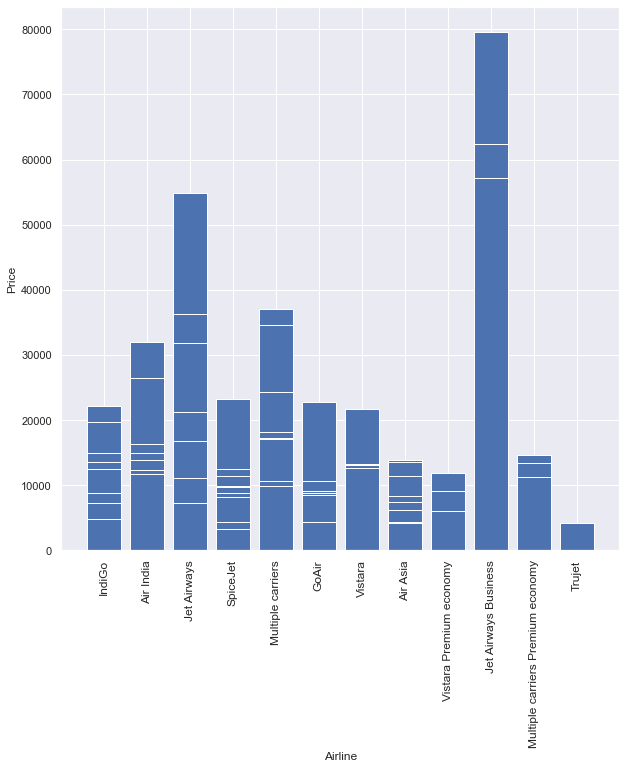

In [47]:
plt.figure(figsize=(10,10))
flights=list(df['Airline'])
cost=list(df['Price'])
plt.bar(flights,cost)
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation='vertical',size=12)
plt.show()

In [48]:
cols=df.columns.tolist()
cols

['Airline',
 'Source',
 'Route',
 'Dep_Time',
 'Arrival_Time',
 'Duration',
 'Total_Stops',
 'Additional_Info',
 'Price',
 'Day_of_Journey',
 'Month_of_Journey',
 'Destination']

In [49]:
cols=cols[0:3]+cols[-1:]+cols[3:11]

In [50]:
cols

['Airline',
 'Source',
 'Route',
 'Destination',
 'Dep_Time',
 'Arrival_Time',
 'Duration',
 'Total_Stops',
 'Additional_Info',
 'Price',
 'Day_of_Journey',
 'Month_of_Journey']

In [51]:
df=df[cols]

In [52]:
df.head(2)

,Airline,Source,Route,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,Banglore,BLR → DEL,Delhi,2022-04-29 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,CCU → IXR → BBI → BLR,Banglore,2022-04-29 05:50:00,2022-04-29 13:15:00,7h 25m,2 stops,No info,7662,5,1


In [53]:
df.groupby(['Source'])['Price'].value_counts()

Source    Price
Banglore  7229     162
          4823     131
          3943     104
          8016      60
          11087     57
                  ... 
Mumbai    23528      1
          23843      1
          24115      1
          24210      1
          25139      1
Name: Price, Length: 1946, dtype: int64

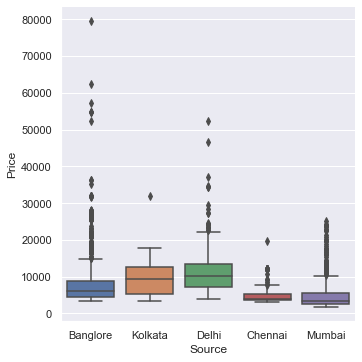

In [54]:
sns.catplot(x = 'Source', y = 'Price',kind = 'box', data = df)

In [55]:
df.groupby(['Airline'])['Price'].value_counts()

Airline                  Price
Air Asia                 3383     31
                         4409     29
                         5192     27
                         3807     19
                         4483     19
                                  ..
Vistara                  18387     1
                         21520     1
Vistara Premium economy  5969      1
                         9125      1
                         11793     1
Name: Price, Length: 1978, dtype: int64

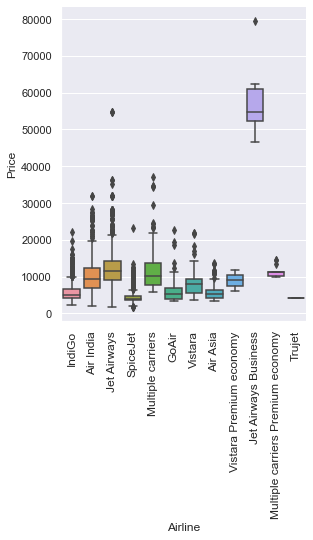

In [56]:
sns.catplot(x = 'Airline', y = 'Price',kind = 'box', data = df)
plt.xticks(rotation='vertical',size=12);

In [57]:
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [58]:
df['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [59]:
df.groupby(['Source'])['Destination'].value_counts()

Source    Destination
Banglore  Delhi          2197
Chennai   Kolkata         381
Delhi     Cochin         4537
Kolkata   Banglore       2871
Mumbai    Hyderabad       697
Name: Destination, dtype: int64

In [60]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [61]:
df.groupby(['Airline'])['Additional_Info'].value_counts()

Airline                            Additional_Info             
Air Asia                           No info                          318
                                   Red-eye flight                     1
Air India                          No info                         1737
                                   Change airports                    7
                                   1 Long layover                     6
                                   1 Short layover                    1
                                   2 Long layover                     1
GoAir                              No info                          194
IndiGo                             No info                         2050
                                   No Info                            3
Jet Airways                        No info                         1950
                                   In-flight meal not included     1886
                                   1 Long layover                    12


In [62]:
df.groupby(['Airline'])['Price'].agg(['max','min'])

,max,min
Airline,,
Air Asia,13774,3383
Air India,31945,2050
GoAir,22794,3398
IndiGo,22153,2227
Jet Airways,54826,1840
Jet Airways Business,79512,46490
Multiple carriers,36983,5797
Multiple carriers Premium economy,14629,9845
SpiceJet,23267,1759


In [63]:
df.iloc[np.where(df['Price'].min())]

,Airline,Source,Route,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,Banglore,BLR → DEL,Delhi,2022-04-29 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3


In [64]:
df.replace({'No info':'No Info'},inplace=True)

In [65]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

# Indigo Flights

In [66]:
a = df.iloc[np.where(df['Airline']=="IndiGo")]

In [67]:
a

,Airline,Source,Route,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,Banglore,BLR → DEL,Delhi,2022-04-29 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No Info,3897,24,3
3,IndiGo,Kolkata,CCU → NAG → BLR,Banglore,2022-04-29 18:05:00,2022-04-29 23:30:00,5h 25m,1 stop,No Info,6218,5,12
4,IndiGo,Banglore,BLR → NAG → DEL,Delhi,2022-04-29 16:50:00,2022-04-29 21:35:00,4h 45m,1 stop,No Info,13302,3,1
11,IndiGo,Kolkata,CCU → BLR,Banglore,2022-04-29 20:20:00,2022-04-29 22:55:00,2h 35m,non-stop,No Info,4174,18,4
14,IndiGo,Kolkata,CCU → BLR,Banglore,2022-04-29 17:15:00,2022-04-29 19:50:00,2h 35m,non-stop,No Info,4804,24,4
...,...,...,...,...,...,...,...,...,...,...,...,...
10631,IndiGo,Delhi,DEL → BLR → COK,Cochin,2022-04-29 02:00:00,2022-04-29 07:45:00,5h 45m,1 stop,No Info,6037,15,5
10641,IndiGo,Chennai,MAA → CCU,Kolkata,2022-04-29 07:55:00,2022-04-29 10:15:00,2h 20m,non-stop,No Info,7295,3,6
10649,IndiGo,Kolkata,CCU → BLR,Banglore,2022-04-29 21:25:00,2022-03-02 00:05:00,2h 40m,non-stop,No Info,4778,3,1
10664,IndiGo,Banglore,BLR → DEL,Delhi,2022-04-29 18:55:00,2022-04-29 21:50:00,2h 55m,non-stop,No Info,4823,4,9


In [68]:
a.groupby(['Source'])['Destination'].value_counts()

Source    Destination
Banglore  Delhi          523
Chennai   Kolkata        184
Delhi     Cochin         705
Kolkata   Banglore       445
Mumbai    Hyderabad      196
Name: Destination, dtype: int64

In [69]:
a['Additional_Info'].unique()

array(['No Info'], dtype=object)

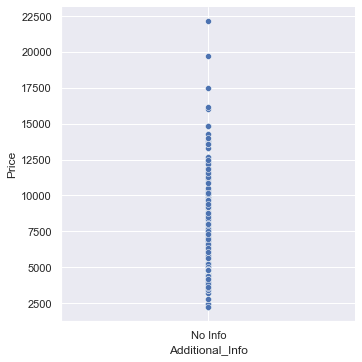

In [70]:
sns.relplot(x = 'Additional_Info', y = 'Price', data = a)

In [71]:
a['Total_Stops'].value_counts()

non-stop    1241
1 stop       793
2 stops       19
Name: Total_Stops, dtype: int64

In [72]:
a['Price'].agg([max,min])

max    22153
min     2227
Name: Price, dtype: int64

<AxesSubplot:xlabel='Total_Stops', ylabel='Count'>

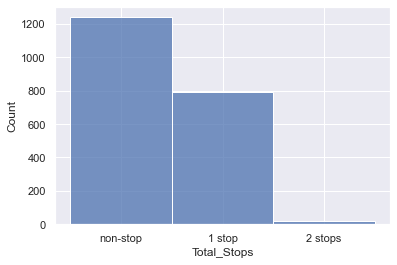

In [73]:
sns.histplot(a['Total_Stops'])

In [74]:
a.groupby(['Month_of_Journey'])['Month_of_Journey'] .value_counts()

Month_of_Journey  Month_of_Journey
1                 1                   184
3                 3                   513
4                 4                   153
5                 5                   329
6                 6                   469
9                 9                   253
12                12                  152
Name: Month_of_Journey, dtype: int64

# Air India Flights

In [75]:
b = df.iloc[np.where(df['Airline']== 'Air India')]

In [76]:
b

,Airline,Source,Route,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
1,Air India,Kolkata,CCU → IXR → BBI → BLR,Banglore,2022-04-29 05:50:00,2022-04-29 13:15:00,7h 25m,2 stops,No Info,7662,5,1
10,Air India,Delhi,DEL → BLR → COK,Cochin,2022-04-29 09:45:00,2022-04-29 23:00:00,13h 15m,1 stop,No Info,8907,6,1
12,Air India,Chennai,MAA → CCU,Kolkata,2022-04-29 11:40:00,2022-04-29 13:55:00,2h 15m,non-stop,No Info,4667,24,6
15,Air India,Delhi,DEL → AMD → BOM → COK,Cochin,2022-04-29 16:40:00,2022-03-04 19:15:00,26h 35m,2 stops,No Info,14011,3,3
18,Air India,Delhi,DEL → CCU → BOM → COK,Cochin,2022-04-29 20:15:00,2022-06-13 19:15:00,23h,2 stops,No Info,13381,6,12
...,...,...,...,...,...,...,...,...,...,...,...,...
10670,Air India,Kolkata,CCU → IXR → DEL → BLR,Banglore,2022-04-29 05:50:00,2022-04-29 23:15:00,17h 25m,2 stops,No Info,11411,5,12
10671,Air India,Mumbai,BOM → HYD,Hyderabad,2022-04-29 21:05:00,2022-04-29 22:25:00,1h 20m,non-stop,No Info,3100,6,6
10675,Air India,Mumbai,BOM → HYD,Hyderabad,2022-04-29 06:20:00,2022-04-29 07:40:00,1h 20m,non-stop,No Info,3100,6,9
10679,Air India,Kolkata,CCU → BLR,Banglore,2022-04-29 20:45:00,2022-04-29 23:20:00,2h 35m,non-stop,No Info,4145,27,4


In [77]:
b.groupby(['Source'])['Destination'].value_counts()

Source    Destination
Banglore  Delhi          332
Chennai   Kolkata         25
Delhi     Cochin         747
Kolkata   Banglore       512
Mumbai    Hyderabad      136
Name: Destination, dtype: int64

In [78]:
b['Total_Stops'].value_counts()

2 stops     756
1 stop      541
non-stop    417
3 stops      37
4 stops       1
Name: Total_Stops, dtype: int64

<AxesSubplot:xlabel='Total_Stops', ylabel='Count'>

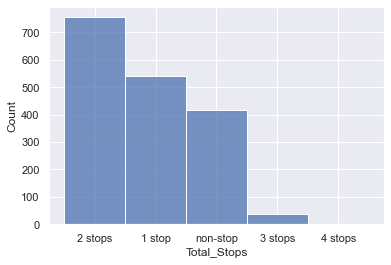

In [79]:
sns.histplot(b['Total_Stops'])

In [80]:
b['Additional_Info'].unique()

array(['No Info', '1 Short layover', '1 Long layover', 'Change airports',
       '2 Long layover'], dtype=object)

In [81]:
b['Additional_Info'].value_counts()

No Info            1737
Change airports       7
1 Long layover        6
1 Short layover       1
2 Long layover        1
Name: Additional_Info, dtype: int64

In [82]:
b['Price'].agg([max,min])

max    31945
min     2050
Name: Price, dtype: int64

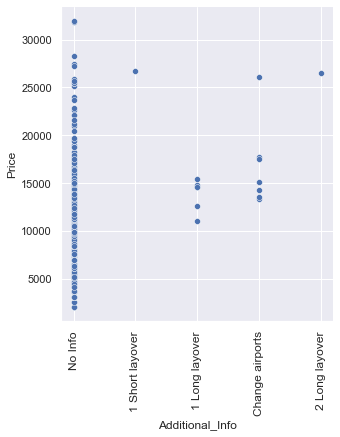

In [83]:
sns.relplot(x = 'Additional_Info', y = 'Price', data = b)
plt.xticks(rotation='vertical', size=12);

In [84]:
b['Duration'].value_counts()

2h 45m     92
2h 50m     91
1h 20m     43
21h 15m    38
2h 30m     32
           ..
5m          1
29h 30m     1
32h 20m     1
10h 35m     1
11h 55m     1
Name: Duration, Length: 225, dtype: int64

In [85]:
b['Duration'].agg([max,min])

max    9h 5m
min      10h
Name: Duration, dtype: object

In [86]:
b.groupby(['Month_of_Journey'])['Month_of_Journey'].value_counts()

Month_of_Journey  Month_of_Journey
1                 1                   197
3                 3                   369
4                 4                    45
5                 5                   352
6                 6                   386
9                 9                   234
12                12                  169
Name: Month_of_Journey, dtype: int64

# Jet Airways Flights

In [87]:
c = df.iloc[np.where(df['Airline']=='Jet Airways')]

In [88]:
c

,Airline,Source,Route,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
2,Jet Airways,Delhi,DEL → LKO → BOM → COK,Cochin,2022-04-29 09:25:00,2022-06-10 04:25:00,19h,2 stops,No Info,13882,6,9
6,Jet Airways,Banglore,BLR → BOM → DEL,Delhi,2022-04-29 18:55:00,2022-03-13 10:25:00,15h 30m,1 stop,In-flight meal not included,11087,3,12
7,Jet Airways,Banglore,BLR → BOM → DEL,Delhi,2022-04-29 08:00:00,2022-03-02 05:05:00,21h 5m,1 stop,No Info,22270,3,1
8,Jet Airways,Banglore,BLR → BOM → DEL,Delhi,2022-04-29 08:55:00,2022-03-13 10:25:00,25h 30m,1 stop,In-flight meal not included,11087,3,12
13,Jet Airways,Kolkata,CCU → BOM → BLR,Banglore,2022-04-29 21:10:00,2022-05-10 09:20:00,12h 10m,1 stop,In-flight meal not included,9663,5,9
...,...,...,...,...,...,...,...,...,...,...,...,...
10668,Jet Airways,Delhi,DEL → JDH → BOM → COK,Cochin,2022-04-29 11:40:00,2022-04-29 19:00:00,7h 20m,2 stops,No Info,21219,5,9
10672,Jet Airways,Delhi,DEL → AMD → BOM → COK,Cochin,2022-04-29 23:05:00,2022-06-28 19:00:00,19h 55m,2 stops,In-flight meal not included,11150,27,6
10673,Jet Airways,Delhi,DEL → AMD → BOM → COK,Cochin,2022-04-29 13:25:00,2022-05-28 04:25:00,15h,2 stops,No Info,16704,27,5
10674,Jet Airways,Banglore,BLR → BOM → DEL,Delhi,2022-04-29 20:35:00,2022-03-13 21:20:00,24h 45m,1 stop,In-flight meal not included,11087,3,12


In [89]:
c.groupby(['Source'])['Destination'].value_counts()

Source    Destination
Banglore  Delhi           788
Delhi     Cochin         1586
Kolkata   Banglore       1256
Mumbai    Hyderabad       219
Name: Destination, dtype: int64

In [90]:
c['Total_Stops'].value_counts()

1 stop      2535
2 stops      691
non-stop     623
Name: Total_Stops, dtype: int64

<AxesSubplot:xlabel='Total_Stops', ylabel='Count'>

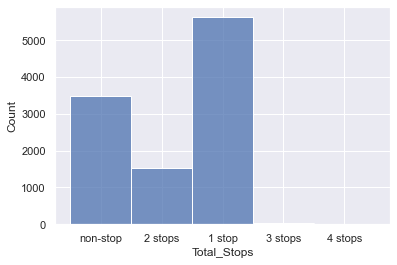

In [91]:
sns.histplot(df['Total_Stops'])

In [92]:
c['Additional_Info'].unique()

array(['No Info', 'In-flight meal not included', '1 Long layover',
       'Business class'], dtype=object)

In [93]:
c['Additional_Info'].value_counts()

No Info                        1950
In-flight meal not included    1886
1 Long layover                   12
Business class                    1
Name: Additional_Info, dtype: int64

In [94]:
c['Price'].agg([max,min])

max    54826
min     1840
Name: Price, dtype: int64

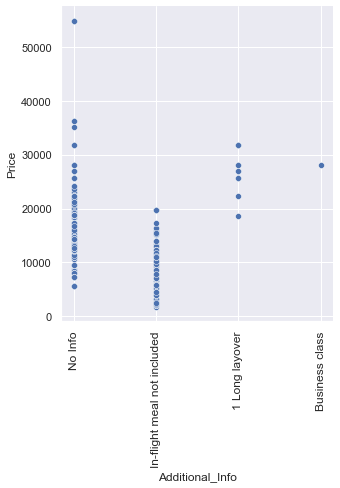

In [95]:
sns.relplot(x = 'Additional_Info', y = 'Price', data = c)
plt.xticks(rotation = 'vertical',size=12);

In [96]:
c.groupby(['Month_of_Journey'])['Month_of_Journey'].value_counts()

Month_of_Journey  Month_of_Journey
1                 1                   430
3                 3                   674
4                 4                    63
5                 5                   783
6                 6                   931
9                 9                   544
12                12                  424
Name: Month_of_Journey, dtype: int64

# SpiceJet Flight

In [97]:
d = df.iloc[np.where(df['Airline']=='SpiceJet')]

In [98]:
d.head(2)

,Airline,Source,Route,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
5,SpiceJet,Kolkata,CCU → BLR,Banglore,2022-04-29 09:00:00,2022-04-29 11:25:00,2h 25m,non-stop,No Info,3873,24,6
16,SpiceJet,Delhi,DEL → PNQ → COK,Cochin,2022-04-29 08:45:00,2022-04-29 13:15:00,4h 30m,1 stop,No Info,5830,15,4


In [99]:
d.groupby(['Source'])['Destination'].value_counts()

Source    Destination
Banglore  Delhi          181
Chennai   Kolkata        128
Delhi     Cochin          87
Kolkata   Banglore       300
Mumbai    Hyderabad      122
Name: Destination, dtype: int64

In [100]:
d['Total_Stops'].value_counts()

non-stop    670
1 stop      148
Name: Total_Stops, dtype: int64

<AxesSubplot:xlabel='Total_Stops', ylabel='Count'>

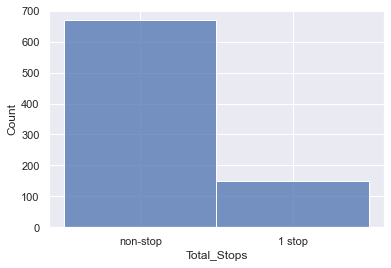

In [101]:
sns.histplot(d['Total_Stops'])

In [102]:
d['Additional_Info'].unique()

array(['No Info', 'No check-in baggage included', '1 Long layover'],
      dtype=object)

In [103]:
d['Additional_Info'].value_counts()

No Info                         497
No check-in baggage included    320
1 Long layover                    1
Name: Additional_Info, dtype: int64

In [104]:
d['Price'].agg([max,min])

max    23267
min     1759
Name: Price, dtype: int64

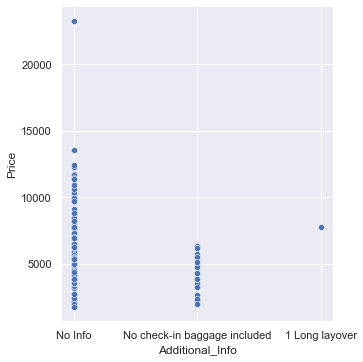

In [105]:
sns.relplot(x = 'Additional_Info', y = 'Price',data = d)

In [106]:
d.groupby(['Month_of_Journey'])['Month_of_Journey'].value_counts()

Month_of_Journey  Month_of_Journey
1                 1                    76
3                 3                   193
4                 4                    76
5                 5                   139
6                 6                   190
9                 9                    90
12                12                   54
Name: Month_of_Journey, dtype: int64

# Multiple Carriers Flight

In [107]:
x = df.iloc[np.where(df['Airline']=='Multiple carriers')]

In [108]:
x

,Airline,Source,Route,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
9,Multiple carriers,Delhi,DEL → BOM → COK,Cochin,2022-04-29 11:25:00,2022-04-29 19:15:00,7h 50m,1 stop,No Info,8625,27,5
40,Multiple carriers,Delhi,DEL → HYD → COK,Cochin,2022-04-29 07:05:00,2022-04-29 18:10:00,11h 5m,1 stop,No Info,9646,21,5
44,Multiple carriers,Delhi,DEL → BOM → COK,Cochin,2022-04-29 09:00:00,2022-04-29 21:00:00,12h,1 stop,No Info,13062,21,3
58,Multiple carriers,Delhi,DEL → BOM → COK,Cochin,2022-04-29 19:00:00,2022-05-07 01:30:00,6h 30m,1 stop,No Info,8073,5,6
62,Multiple carriers,Delhi,DEL → BOM → COK,Cochin,2022-04-29 08:45:00,2022-04-29 19:00:00,10h 15m,1 stop,No Info,12524,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10643,Multiple carriers,Delhi,DEL → BOM → COK,Cochin,2022-04-29 19:00:00,2022-05-19 01:30:00,6h 30m,1 stop,No Info,7670,18,5
10644,Multiple carriers,Delhi,DEL → BOM → COK,Cochin,2022-04-29 10:35:00,2022-04-29 19:00:00,8h 25m,1 stop,No Info,10877,6,6
10645,Multiple carriers,Delhi,DEL → BOM → COK,Cochin,2022-04-29 07:05:00,2022-04-29 15:30:00,8h 25m,1 stop,No Info,17057,3,3
10651,Multiple carriers,Delhi,DEL → BOM → COK,Cochin,2022-04-29 04:55:00,2022-04-29 12:35:00,7h 40m,1 stop,No Info,10678,27,6


In [109]:
x.groupby(['Source'])['Destination'].value_counts()

Source  Destination
Delhi   Cochin         1196
Name: Destination, dtype: int64

In [110]:
x['Total_Stops'].value_counts()

1 stop     1145
2 stops      43
3 stops       8
Name: Total_Stops, dtype: int64

<AxesSubplot:xlabel='Total_Stops', ylabel='Count'>

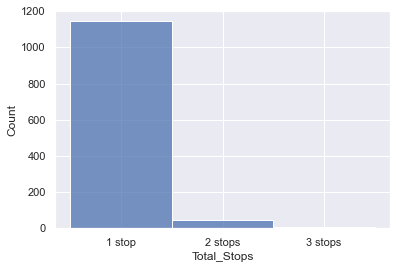

In [111]:
sns.histplot(x['Total_Stops'])

In [112]:
x['Additional_Info'].value_counts()

No Info                        1100
In-flight meal not included      96
Name: Additional_Info, dtype: int64

In [113]:
x['Price'].agg([max,min])

max    36983
min     5797
Name: Price, dtype: int64

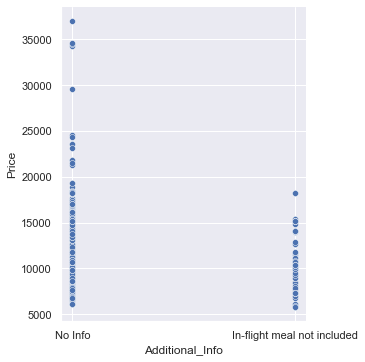

In [114]:
sns.relplot(x = 'Additional_Info', y = 'Price', data=x)

In [115]:
x.groupby(['Month_of_Journey'])['Month_of_Journey'].value_counts()

Month_of_Journey  Month_of_Journey
1                 1                    75
3                 3                   261
4                 4                     2
5                 5                   292
6                 6                   341
9                 9                   160
12                12                   65
Name: Month_of_Journey, dtype: int64

# Go Air Flight

In [116]:
y = df.iloc[np.where(df['Airline']=='GoAir')]

In [117]:
y

,Airline,Source,Route,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
20,GoAir,Delhi,DEL → BOM → COK,Cochin,2022-04-29 14:10:00,2022-04-29 19:20:00,5h 10m,1 stop,No Info,19495,3,6
27,GoAir,Delhi,DEL → BOM → COK,Cochin,2022-04-29 07:00:00,2022-04-29 12:55:00,5h 55m,1 stop,No Info,7682,15,5
76,GoAir,Banglore,BLR → DEL,Delhi,2022-04-29 11:40:00,2022-04-29 14:30:00,2h 50m,non-stop,No Info,3898,4,3
114,GoAir,Delhi,DEL → BOM → COK,Cochin,2022-04-29 07:00:00,2022-04-29 12:55:00,5h 55m,1 stop,No Info,5281,27,6
141,GoAir,Kolkata,CCU → BOM → BLR,Banglore,2022-04-29 23:30:00,2022-06-07 07:45:00,8h 15m,1 stop,No Info,6686,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...
10440,GoAir,Banglore,BLR → DEL,Delhi,2022-04-29 20:55:00,2022-04-29 23:50:00,2h 55m,non-stop,No Info,5706,24,3
10510,GoAir,Banglore,BLR → DEL,Delhi,2022-04-29 11:40:00,2022-04-29 14:35:00,2h 55m,non-stop,No Info,6113,15,3
10517,GoAir,Banglore,BLR → DEL,Delhi,2022-04-29 11:40:00,2022-04-29 14:30:00,2h 50m,non-stop,No Info,3398,21,6
10524,GoAir,Delhi,DEL → AMD → COK,Cochin,2022-04-29 06:00:00,2022-04-29 13:20:00,7h 20m,1 stop,No Info,8422,3,9


In [118]:
y.groupby(['Source'])['Destination'].value_counts()

Source    Destination
Banglore  Delhi          93
Delhi     Cochin         76
Kolkata   Banglore       25
Name: Destination, dtype: int64

In [119]:
y['Total_Stops'].value_counts()

1 stop      102
non-stop     92
Name: Total_Stops, dtype: int64

<AxesSubplot:xlabel='Total_Stops', ylabel='Count'>

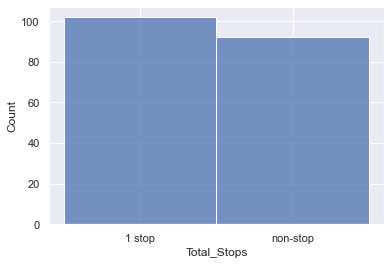

In [120]:
sns.histplot(y['Total_Stops'])

In [121]:
y['Additional_Info'].value_counts()

No Info    194
Name: Additional_Info, dtype: int64

In [122]:
y['Price'].agg([max,min])

max    22794
min     3398
Name: Price, dtype: int64

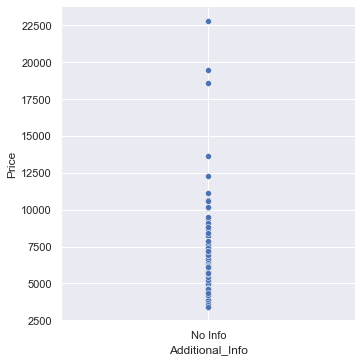

In [123]:
sns.relplot(x = 'Additional_Info', y = 'Price', data = y)

In [124]:
y.groupby(['Month_of_Journey'])['Month_of_Journey'].value_counts()

Month_of_Journey  Month_of_Journey
1                 1                   21
3                 3                   43
4                 4                   22
5                 5                   28
6                 6                   45
9                 9                   23
12                12                  12
Name: Month_of_Journey, dtype: int64

# Vistara Flight

In [125]:
v = df.iloc[np.where(df['Airline']=='Vistara')]

In [126]:
v

,Airline,Source,Route,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
28,Vistara,Banglore,BLR → DEL,Delhi,2022-04-29 09:45:00,2022-04-29 12:35:00,2h 50m,non-stop,No Info,4668,18,6
29,Vistara,Chennai,MAA → CCU,Kolkata,2022-04-29 07:05:00,2022-04-29 09:20:00,2h 15m,non-stop,No Info,3687,15,6
30,Vistara,Chennai,MAA → CCU,Kolkata,2022-04-29 07:05:00,2022-04-29 09:20:00,2h 15m,non-stop,No Info,3687,18,6
57,Vistara,Chennai,MAA → CCU,Kolkata,2022-04-29 07:05:00,2022-04-29 09:20:00,2h 15m,non-stop,No Info,7414,3,6
59,Vistara,Mumbai,BOM → DEL → HYD,Hyderabad,2022-04-29 15:40:00,2022-03-07 16:45:00,25h 5m,1 stop,No Info,12395,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...
10624,Vistara,Kolkata,CCU → DEL → BLR,Banglore,2022-04-29 20:20:00,2022-06-07 22:40:00,26h 20m,1 stop,No Info,8662,6,6
10656,Vistara,Banglore,BLR → DEL,Delhi,2022-04-29 07:00:00,2022-04-29 09:40:00,2h 40m,non-stop,No Info,5613,4,6
10659,Vistara,Banglore,BLR → DEL,Delhi,2022-04-29 21:00:00,2022-04-29 23:50:00,2h 50m,non-stop,No Info,4668,5,1
10660,Vistara,Banglore,BLR → DEL,Delhi,2022-04-29 21:10:00,2022-03-19 00:05:00,2h 55m,non-stop,No Info,4878,21,3


In [127]:
v.groupby(['Source'])['Destination'].value_counts()

Source    Destination
Banglore  Delhi          185
Chennai   Kolkata         43
Delhi     Cochin          45
Kolkata   Banglore       183
Mumbai    Hyderabad       23
Name: Destination, dtype: int64

In [128]:
v['Total_Stops'].value_counts()

non-stop    264
1 stop      215
Name: Total_Stops, dtype: int64

<AxesSubplot:xlabel='Total_Stops', ylabel='Count'>

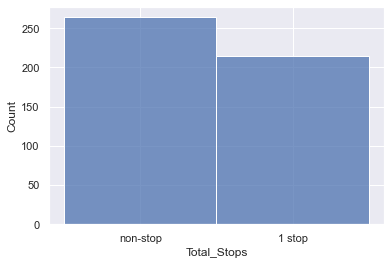

In [129]:
sns.histplot(v['Total_Stops'])

In [130]:
v['Additional_Info'].value_counts()

No Info    479
Name: Additional_Info, dtype: int64

In [131]:
v['Price'].agg([max,min])

max    21730
min     3687
Name: Price, dtype: int64

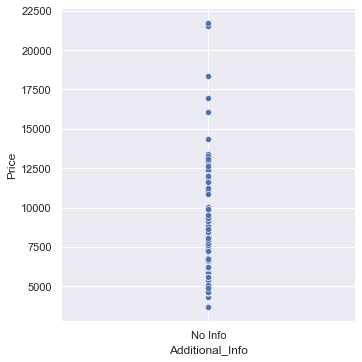

In [132]:
sns.relplot(x = 'Additional_Info', y = 'Price', data=v)

In [133]:
v.groupby(['Month_of_Journey'])['Month_of_Journey'].value_counts()

Month_of_Journey  Month_of_Journey
1                 1                    59
3                 3                    84
4                 4                    31
5                 5                    90
6                 6                   102
9                 9                    61
12                12                   52
Name: Month_of_Journey, dtype: int64

# Air Asia Flight

In [134]:
z = df.iloc[np.where(df['Airline']=='Air Asia')]

In [135]:
z

,Airline,Source,Route,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
43,Air Asia,Banglore,BLR → DEL,Delhi,2022-04-29 11:10:00,2022-04-29 13:55:00,2h 45m,non-stop,No Info,3383,5,6
54,Air Asia,Banglore,BLR → DEL,Delhi,2022-04-29 23:55:00,2022-04-04 02:45:00,2h 50m,non-stop,No Info,4483,4,3
189,Air Asia,Banglore,BLR → DEL,Delhi,2022-04-29 11:10:00,2022-04-29 13:55:00,2h 45m,non-stop,No Info,3383,6,12
235,Air Asia,Kolkata,CCU → BLR,Banglore,2022-04-29 10:20:00,2022-04-29 12:55:00,2h 35m,non-stop,No Info,4409,5,1
302,Air Asia,Kolkata,CCU → BLR,Banglore,2022-04-29 10:20:00,2022-04-29 12:55:00,2h 35m,non-stop,No Info,5216,5,12
...,...,...,...,...,...,...,...,...,...,...,...,...
10425,Air Asia,Kolkata,CCU → BLR,Banglore,2022-04-29 19:55:00,2022-04-29 22:25:00,2h 30m,non-stop,No Info,4409,4,12
10504,Air Asia,Delhi,DEL → BLR → COK,Cochin,2022-04-29 07:55:00,2022-04-29 22:25:00,14h 30m,1 stop,No Info,6152,6,12
10550,Air Asia,Kolkata,CCU → BLR,Banglore,2022-04-29 19:35:00,2022-04-29 22:05:00,2h 30m,non-stop,No Info,4384,3,12
10590,Air Asia,Banglore,BLR → DEL,Delhi,2022-04-29 23:25:00,2022-03-22 02:10:00,2h 45m,non-stop,No Info,3383,24,3


In [136]:
z.groupby(['Source'])['Destination'].value_counts()

Source    Destination
Banglore  Delhi           89
Delhi     Cochin          80
Kolkata   Banglore       150
Name: Destination, dtype: int64

In [137]:
z['Total_Stops'].value_counts()

non-stop    181
1 stop      129
2 stops       9
Name: Total_Stops, dtype: int64

<AxesSubplot:xlabel='Total_Stops', ylabel='Count'>

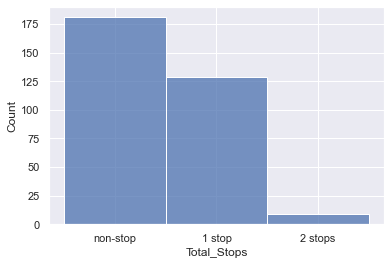

In [138]:
sns.histplot(z['Total_Stops'])

In [139]:
z['Additional_Info'].value_counts()

No Info           318
Red-eye flight      1
Name: Additional_Info, dtype: int64

In [140]:
z['Price'].agg([max,min])

max    13774
min     3383
Name: Price, dtype: int64

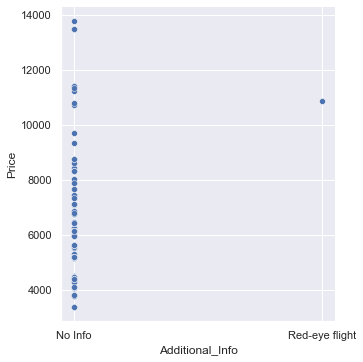

In [141]:
sns.relplot(x = 'Additional_Info', y = 'Price', data = z)

In [142]:
z.groupby(['Month_of_Journey'])['Month_of_Journey'].value_counts()

Month_of_Journey  Month_of_Journey
1                 1                   28
3                 3                   59
4                 4                   32
5                 5                   61
6                 6                   69
9                 9                   41
12                12                  29
Name: Month_of_Journey, dtype: int64

In [143]:
 df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

# Vistara Premium Economy Flight

In [144]:
f = df.iloc[np.where(df['Airline']=='Vistara Premium economy')]

In [145]:
f

,Airline,Source,Route,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
426,Vistara Premium economy,Banglore,BLR → DEL,Delhi,2022-04-29 16:00:00,2022-04-29 18:35:00,2h 35m,non-stop,No Info,11793,3,3
7657,Vistara Premium economy,Chennai,MAA → CCU,Kolkata,2022-04-29 07:05:00,2022-04-29 09:20:00,2h 15m,non-stop,No Info,9125,3,1
8615,Vistara Premium economy,Banglore,BLR → DEL,Delhi,2022-04-29 11:30:00,2022-04-29 14:20:00,2h 50m,non-stop,No Info,5969,4,6


In [146]:
f.groupby(['Source'])['Destination'].value_counts()

Source    Destination
Banglore  Delhi          2
Chennai   Kolkata        1
Name: Destination, dtype: int64

In [147]:
f['Total_Stops'].value_counts()

non-stop    3
Name: Total_Stops, dtype: int64

In [148]:
f['Additional_Info'].value_counts()

No Info    3
Name: Additional_Info, dtype: int64

In [149]:
f['Price'].agg([max,min])

max    11793
min     5969
Name: Price, dtype: int64

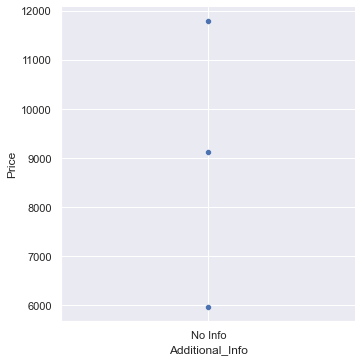

In [150]:
sns.relplot(x = 'Additional_Info', y = 'Price', data=f)

In [151]:
f.groupby(["Month_of_Journey"])['Month_of_Journey'].value_counts()

Month_of_Journey  Month_of_Journey
1                 1                   1
3                 3                   1
6                 6                   1
Name: Month_of_Journey, dtype: int64

In [152]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

# Jet Airways Business Flight

In [153]:
j = df.iloc[np.where(df['Airline']=='Jet Airways Business')]

In [154]:
j

,Airline,Source,Route,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
657,Jet Airways Business,Banglore,BLR → BOM → DEL,Delhi,2022-04-29 05:45:00,2022-04-29 10:45:00,5h,1 stop,No Info,52229,3,1
2924,Jet Airways Business,Banglore,BLR → BOM → DEL,Delhi,2022-04-29 05:45:00,2022-04-29 11:25:00,5h 40m,1 stop,Business class,79512,3,1
5372,Jet Airways Business,Banglore,BLR → BOM → DEL,Delhi,2022-04-29 05:45:00,2022-04-29 12:25:00,6h 40m,1 stop,Business class,62427,3,1
7351,Jet Airways Business,Delhi,DEL → ATQ → BOM → COK,Cochin,2022-04-29 20:05:00,2022-03-04 04:25:00,8h 20m,2 stops,No Info,46490,3,3
9715,Jet Airways Business,Delhi,DEL → ATQ → BOM → COK,Cochin,2022-04-29 20:05:00,2022-03-07 04:25:00,8h 20m,2 stops,No Info,52285,3,6
10364,Jet Airways Business,Banglore,BLR → MAA → DEL,Delhi,2022-04-29 09:45:00,2022-04-29 14:25:00,4h 40m,1 stop,Business class,57209,3,1


In [155]:
j.groupby(['Source'])['Destination'].value_counts()

Source    Destination
Banglore  Delhi          4
Delhi     Cochin         2
Name: Destination, dtype: int64

In [156]:
j['Total_Stops'].value_counts()

1 stop     4
2 stops    2
Name: Total_Stops, dtype: int64

<AxesSubplot:xlabel='Total_Stops', ylabel='Count'>

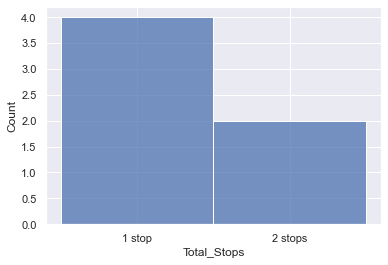

In [157]:
sns.histplot(j['Total_Stops'])

In [158]:
j['Additional_Info'].value_counts()

No Info           3
Business class    3
Name: Additional_Info, dtype: int64

In [159]:
j['Price'].agg([max,min])

max    79512
min    46490
Name: Price, dtype: int64

<AxesSubplot:xlabel='Additional_Info', ylabel='Price'>

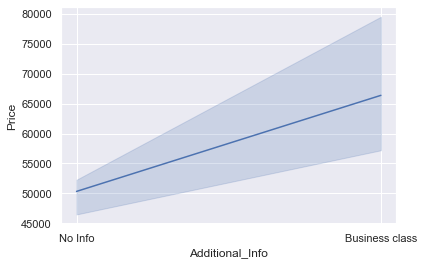

In [160]:
sns.lineplot(x = 'Additional_Info', y = 'Price', data = j)

In [161]:
j.groupby(['Month_of_Journey'])['Month_of_Journey'].value_counts()

Month_of_Journey  Month_of_Journey
1                 1                   4
3                 3                   1
6                 6                   1
Name: Month_of_Journey, dtype: int64

# Multiple carriers Premium economy Flight

In [162]:
m = df.iloc[np.where(df['Airline']=='Multiple carriers Premium economy')]

In [163]:
m

,Airline,Source,Route,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
717,Multiple carriers Premium economy,Delhi,DEL → BOM → COK,Cochin,2022-04-29 07:30:00,2022-04-29 19:15:00,11h 45m,1 stop,No Info,10161,21,3
1799,Multiple carriers Premium economy,Delhi,DEL → BOM → COK,Cochin,2022-04-29 07:30:00,2022-04-29 21:00:00,13h 30m,1 stop,No Info,9845,21,3
4627,Multiple carriers Premium economy,Delhi,DEL → BOM → COK,Cochin,2022-04-29 08:55:00,2022-04-29 19:15:00,10h 20m,1 stop,No Info,10161,21,3
4718,Multiple carriers Premium economy,Delhi,DEL → BOM → COK,Cochin,2022-04-29 06:00:00,2022-04-29 21:00:00,15h,1 stop,No Info,9845,21,3
5090,Multiple carriers Premium economy,Delhi,DEL → BOM → COK,Cochin,2022-04-29 06:00:00,2022-04-29 13:20:00,7h 20m,1 stop,No Info,11269,21,3
5489,Multiple carriers Premium economy,Delhi,DEL → BOM → COK,Cochin,2022-04-29 06:00:00,2022-04-29 15:30:00,9h 30m,1 stop,No Info,11269,21,3
5673,Multiple carriers Premium economy,Delhi,DEL → BOM → COK,Cochin,2022-04-29 06:00:00,2022-04-29 18:50:00,12h 50m,1 stop,No Info,14629,21,3
5836,Multiple carriers Premium economy,Delhi,DEL → BOM → COK,Cochin,2022-04-29 07:30:00,2022-04-29 18:50:00,11h 20m,1 stop,No Info,14629,21,3
6470,Multiple carriers Premium economy,Delhi,DEL → BOM → COK,Cochin,2022-04-29 08:55:00,2022-04-29 21:00:00,12h 5m,1 stop,No Info,9845,21,3
6591,Multiple carriers Premium economy,Delhi,DEL → BOM → COK,Cochin,2022-04-29 08:55:00,2022-04-29 15:30:00,6h 35m,1 stop,No Info,11269,21,3


In [164]:
m.groupby(['Source'])['Destination'].value_counts()

Source  Destination
Delhi   Cochin         13
Name: Destination, dtype: int64

In [165]:
m['Total_Stops'].value_counts()

1 stop    13
Name: Total_Stops, dtype: int64

In [166]:
m['Additional_Info'].value_counts()

No Info    13
Name: Additional_Info, dtype: int64

In [167]:
m['Price'].agg([max,min])

max    14629
min     9845
Name: Price, dtype: int64

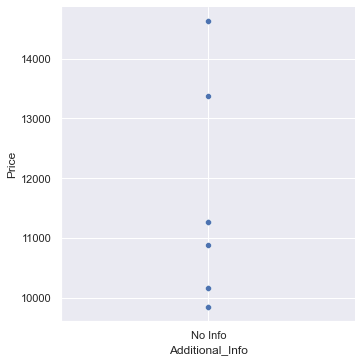

In [168]:
sns.relplot(x = 'Additional_Info', y = 'Price', data = m)

In [169]:
m.groupby(['Month_of_Journey'])['Month_of_Journey'].value_counts()

Month_of_Journey  Month_of_Journey
3                 3                   13
Name: Month_of_Journey, dtype: int64

# Trujet Flight

In [170]:
df.iloc[np.where(df['Airline']=='Trujet')]

,Airline,Source,Route,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
2878,Trujet,Mumbai,BOM → NDC → HYD,Hyderabad,2022-04-29 13:05:00,2022-04-29 16:20:00,3h 15m,1 stop,No Info,4140,3,6
